In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(220, 220)


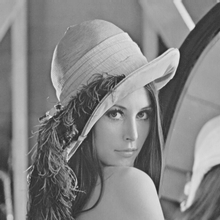

True

In [ ]:
# Colab資料夾設定方法
# !pip install google.colab # 如未安裝則需進行安裝
import os
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

# !!提醒需手動執行授權
os.chdir('/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Ref Image/')  # 切換該目錄
os.listdir()  # 確認目錄內容

# Check if the file exists before reading it.
# Print an error message and exit if it does not.
image_path = "Lenna_(test_image).png"
if not os.path.exists(image_path):
    print(F"Error: Image file not found: {image_path}")
    exit()

image = cv2.imread(image_path, 0)
print(image.shape)
cv2_imshow(image)

# 儲存圖片
cv2.imwrite('resize.jpg', image)


In [ ]:
from IPython.display import Image

# 顯示圖片
Image("/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Lesson Practice/20250226_094001.jpg")


Output hidden; open in https://colab.research.google.com to view.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
請輸入想量化的位元數(1~8): 3
原灰階影像:


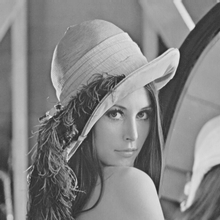

3 bit 量化影像:


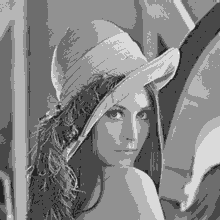

In [ ]:
import cv2
import numpy as np
import os
from google.colab import drive
# 專門用來在 Colab 顯示影像
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

def quantize_image_opencv(gray_img, bits):
    levels = 2 ** bits
    # 先正規化到 [0,1]
    normalized = gray_img / 255.0
    # 離散化到 0~(levels-1)
    quantized = np.round(normalized * (levels - 1))
    # 放大回 0~255
    quantized_8u = (quantized / (levels - 1) * 255).astype(np.uint8)
    return quantized_8u

def main():
    # !!提醒需手動執行授權
    os.chdir('/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Ref Image/')  # 切換該目錄
    os.listdir()  # 確認目錄內容

    image_path = "Lenna_(test_image).png"
    if not os.path.exists(image_path):
        print(f"Error: Image file not found: {image_path}")
        exit()

    # 以灰階模式讀取
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    b = int(input("請輸入想量化的位元數(1~8): "))

    # 量化
    quantized_img = quantize_image_opencv(img, b)

    # 在 Colab 顯示影像需用 cv2_imshow
    print("原灰階影像:")
    cv2_imshow(img)
    print(f"{b} bit 量化影像:")
    cv2_imshow(quantized_img)

if __name__ == '__main__':
    main()


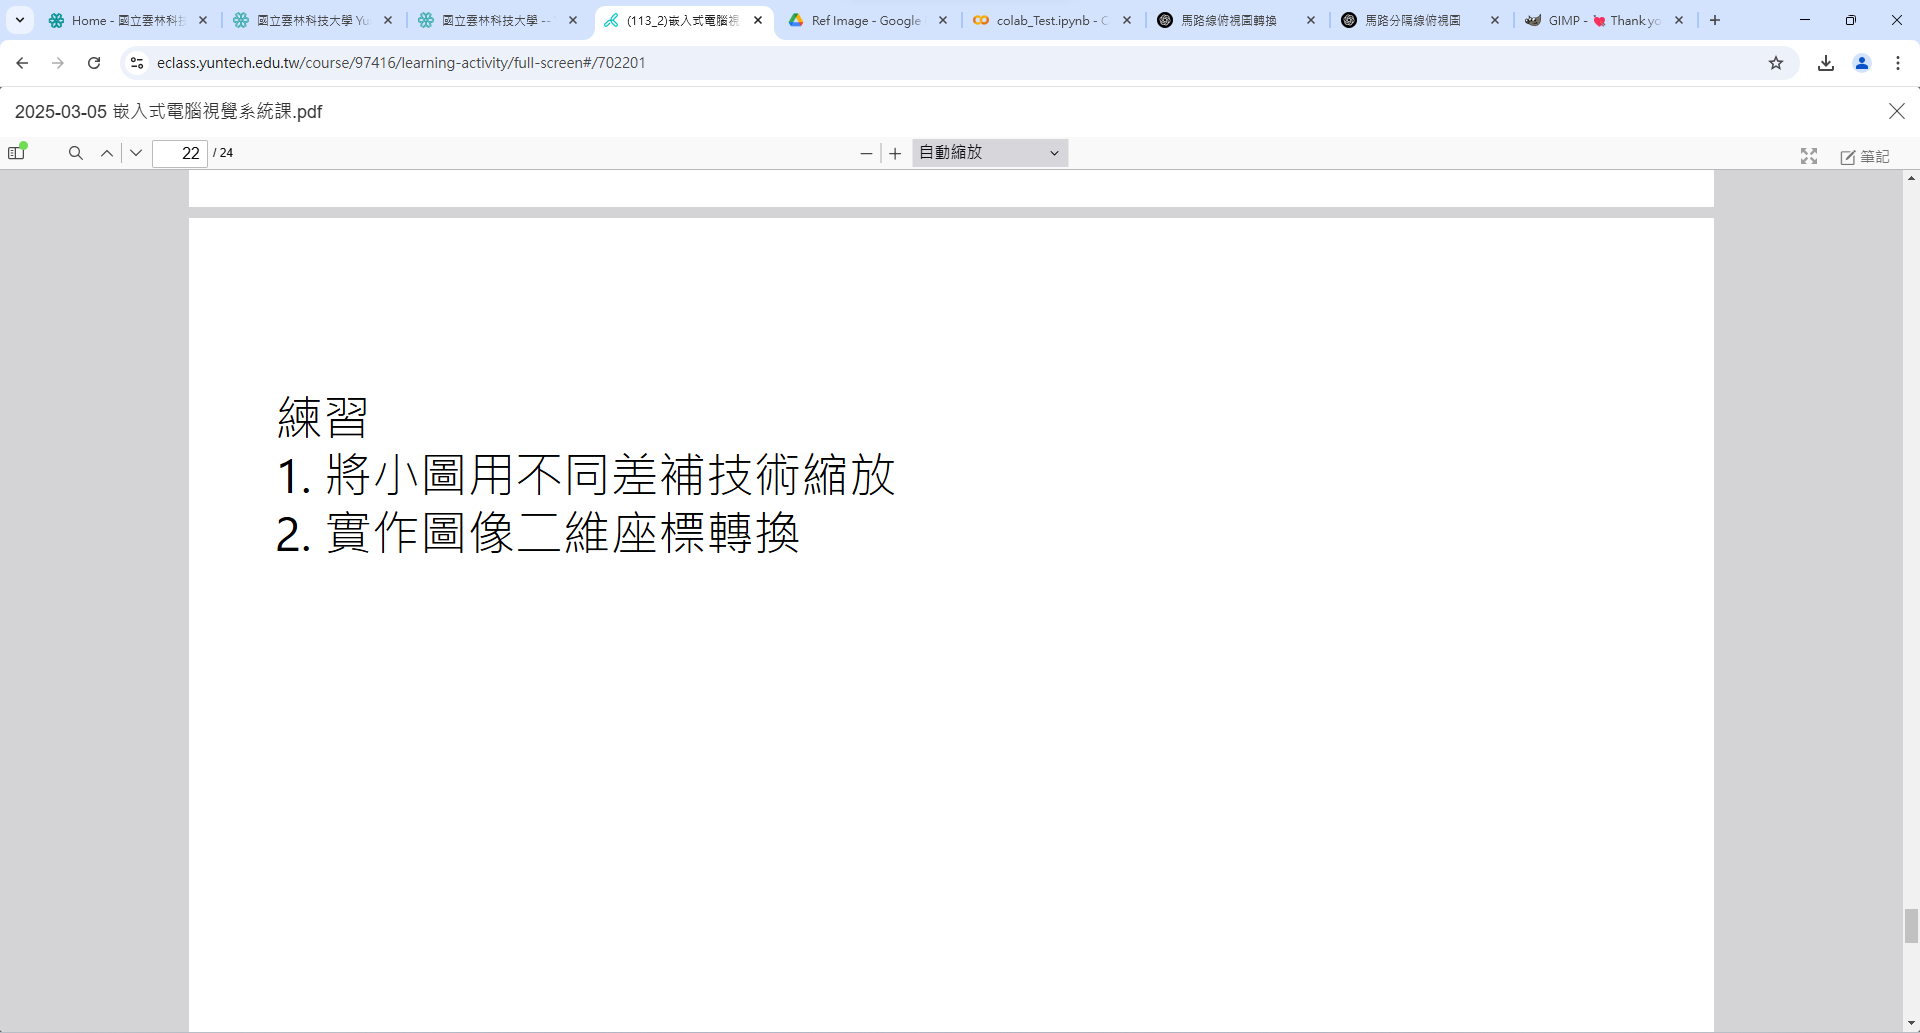

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


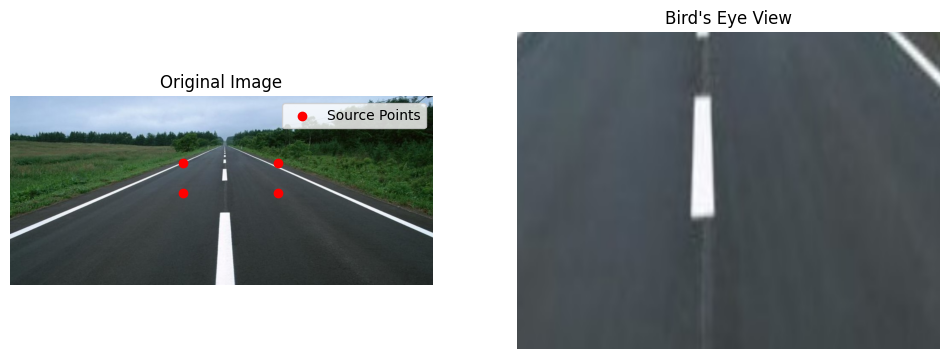

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Ref Image/')  # 切換該目錄
os.listdir()  # 確認目錄內容

image_path = "/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Ref Image/Lane.jpg"
if not os.path.exists(image_path):
    print(f"Error: Image file not found: {image_path}")
    exit()

# 讀取原始影像
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 轉換為 RGB 格式以供 Matplotlib 顯示

# 設定原圖像中 ROI 的四個頂點 (以 [x, y] 格式)
pts_src = np.float32([
    [507, 194],  # 左上
    [784, 194],  # 右上
    [507, 284],  # 左下
    [784, 284]   # 右下
])

# 設定俯視圖中對應的四個頂點
W, H = 800, 600  # 定義輸出影像大小
pts_dst = np.float32([
    [0, 0],    # 左上
    [W, 0],    # 右上
    [0, H],    # 左下
    [W, H]     # 右下
])

# 計算透視變換矩陣 M
M = cv2.getPerspectiveTransform(pts_src, pts_dst)

# 將影像扭正為俯視圖
warped = cv2.warpPerspective(image, M, (W, H))

# 使用 Matplotlib 顯示原始影像與俯視影像
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 顯示原始影像
ax[0].imshow(image)
ax[0].scatter(pts_src[:, 0], pts_src[:, 1], c='red', marker='o', label='Source Points')
ax[0].set_title("Original Image")
ax[0].legend()
ax[0].axis("off")

# 顯示俯視影像
ax[1].imshow(warped)
ax[1].set_title("Bird's Eye View")
ax[1].axis("off")

# 顯示圖片
plt.show()


In [3]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Unins

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


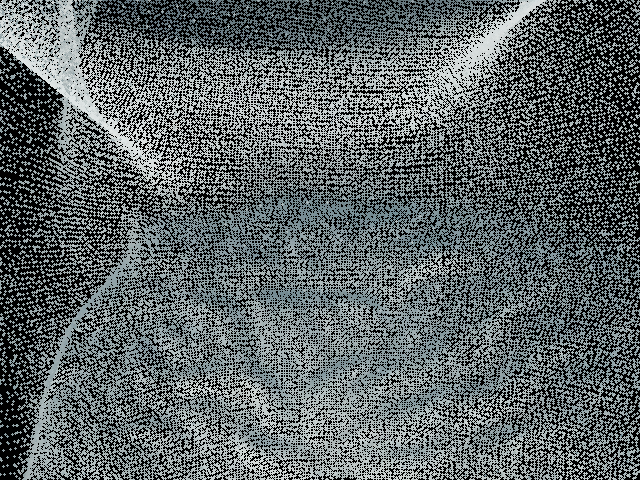

In [8]:
import open3d as o3d
import cv2
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

image_path = "/content/drive/MyDrive/雲科大/崁入式電腦視覺系統/Ref Image/david RGB.ply"

# 讀取 ply 點雲文件
pcd = o3d.io.read_point_cloud(image_path)
points = np.asarray(pcd.points)    # 點雲的 3D 座標 (N, 3)
colors = np.asarray(pcd.colors)      # 點雲的 RGB 顏色 (N, 3)，通常範圍在 [0,1]

# 定義相機內參數矩陣 (這裡的數值僅為示例，可根據實際情況調整)
fx = 525.0  # 水平焦距
fy = 525.0  # 垂直焦距
cx = 319.5  # 影像主點 (x)
cy = 239.5  # 影像主點 (y)
camera_matrix = np.array([[fx, 0, cx],
                          [0, fy, cy],
                          [0,  0,  1]])

# 設定相機外參數，這裡以無旋轉、無平移作示例
# 若有旋轉和平移，可依據實際情況修改 rvec 與 tvec 的數值
rvec = np.array([0, 0, 0], dtype=np.float64)  # 旋轉向量
tvec = np.array([0, 0, 0], dtype=np.float64)  # 平移向量

# OpenCV 的 projectPoints 函數需要 rvec 與 tvec 為 (3,1) 向量
rvec = rvec.reshape((3,1))
tvec = tvec.reshape((3,1))

# 利用 cv2.projectPoints 將 3D 點投影到 2D 影像平面
image_points, _ = cv2.projectPoints(points, rvec, tvec, camera_matrix, None)
image_points = image_points.reshape(-1, 2)

# 建立一張空的影像 (假設影像大小為 640x480)
image = np.zeros((480, 640, 3), dtype=np.uint8)

# 將投影後的點繪製到影像上
for pt, color in zip(image_points, colors):
    x, y = int(pt[0]), int(pt[1])
    if 0 <= x < 640 and 0 <= y < 480:
        # 將顏色從 [0,1] 轉換到 [0,255]
        col = (color * 255).astype(np.uint8).tolist()
        cv2.circle(image, (x, y), radius=1, color=col, thickness=-1)

# 儲存並顯示結果影像
cv2.imwrite("projected_image.jpg", image)

# 在 Google Colab 中顯示影像 (Colab 需要使用 cv2_imshow)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()